# 🏡 Texas Airbnb Market Analysis – Austin Edition
Exploratory Data Analysis (EDA) of Airbnb listings in Austin, Texas.

**Objective:** Build foundational skills in data visualization and probability using a familiar domain. This project explores price distributions, occupancy patterns, and neighborhood trends using the Inside Airbnb dataset.

**Skills practiced:**
- Data loading & cleaning (Pandas)
- Exploratory data visualization (Matplotlib / Seaborn)
- Probability & descriptive statistics
- Insight communication


In [1]:
# ─── Imports ─────────────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted', font_scale=1.1)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
# ─── Load Dataset ─────────────────────────────────────────────────
file_path = '../data/raw/listings.csv'
df = pd.read_csv(file_path, low_memory=False)
print('Shape:', df.shape)
df.head(3)

Shape: (15187, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20250613040113,2025-06-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,1,1,0,0,3.59
1,5769,https://www.airbnb.com/rooms/5769,20250613040113,2025-06-13,city scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.77,4.92,NaN,f,1,0,1,0,1.65
2,6413,https://www.airbnb.com/rooms/6413,20250613040113,2025-06-14,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/hosting/Hosti...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.65


In [3]:
# ─── Initial Data Overview ─────────────────────────────────────────
df.info()
df.describe(include='all').T.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15187 entries, 0 to 15186
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15187 non-null  int64  
 1   listing_url                                   15187 non-null  object 
 2   scrape_id                                     15187 non-null  int64  
 3   last_scraped                                  15187 non-null  object 
 4   source                                        15187 non-null  object 
 5   name                                          15187 non-null  object 
 6   description                                   14840 non-null  object 
 7   neighborhood_overview                         7914 non-null   object 
 8   picture_url                                   15186 non-null  object 
 9   host_id                                       15187 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,15187.0,NaN,NaN,NaN,599524500272389120.0,552027769480232512.0,5456.0,32154255.5,697316005746793984.0,1128969870717137664.0,1441660813139987456.0
listing_url,15187,15187,https://www.airbnb.com/rooms/5456,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,15187.0,NaN,NaN,NaN,20250613040112.996094,7.531498,20250613040113.0,20250613040113.0,20250613040113.0,20250613040113.0,20250613040113.0
last_scraped,15187,2,2025-06-13,9703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,15187,2,city scrape,10718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,15187,14826,Wyndham Austin Resort|1BR/1BA King Bed w/ Gym&...,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,14840,13245,Please click on -show more- and read the descr...,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_overview,7914,6332,"• CW Austin Resort is in Austin, Texas.",115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
picture_url,15186,14750,https://a0.muscache.com/pictures/miso/Hosting-...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,15187.0,NaN,NaN,NaN,181790758.820043,200863059.283045,23.0,18493210.0,84767145.0,332708089.5,700650145.0


## 🔍 Step 1: Data Cleaning
- Inspect missing values.
- Keep relevant columns for analysis.
- Convert price fields to numeric.


In [4]:
# Check for missing values
missing = df.isna().mean().sort_values(ascending=False)
missing.head(20)

neighbourhood_group_cleansed    1.000000
calendar_updated                1.000000
license                         1.000000
neighbourhood                   0.478896
neighborhood_overview           0.478896
host_about                      0.384276
beds                            0.295713
estimated_revenue_l365d         0.294923
price                           0.294923
bathrooms                       0.294528
host_response_rate              0.284388
host_response_time              0.284388
host_acceptance_rate            0.230394
review_scores_value             0.191809
review_scores_location          0.191809
review_scores_checkin           0.191743
review_scores_rating            0.191677
first_review                    0.191677
review_scores_communication     0.191677
review_scores_cleanliness       0.191677
dtype: float64

In [5]:
# Select subset of relevant columns
cols = ['id','name','neighbourhood_cleansed','room_type','price','minimum_nights','number_of_reviews','availability_365','review_scores_rating']
df_sub = df[cols].copy()

# Clean price column
df_sub['price'] = df_sub['price'].replace({'\$':'',',':''}, regex=True).astype(float)
df_sub.head()

,id,name,neighbourhood_cleansed,room_type,price,minimum_nights,number_of_reviews,availability_365,review_scores_rating
0,5456,"Walk to 6th, Rainey St and Convention Ctr",78702,Entire home/apt,101.0,2,711,336,4.85
1,5769,NW Austin Room,78729,Private room,45.0,1,304,4,4.91
2,6413,Gem of a Studio near Downtown,78704,Entire home/apt,NaN,30,123,0,4.98
3,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",78704,Entire home/apt,155.0,3,338,312,4.97
4,8502,Woodland Studio Lodging,78741,Entire home/apt,43.0,4,54,98,4.57


## 📊 Step 2: Visualization — Price Distribution
Goal: Understand price range and outliers.


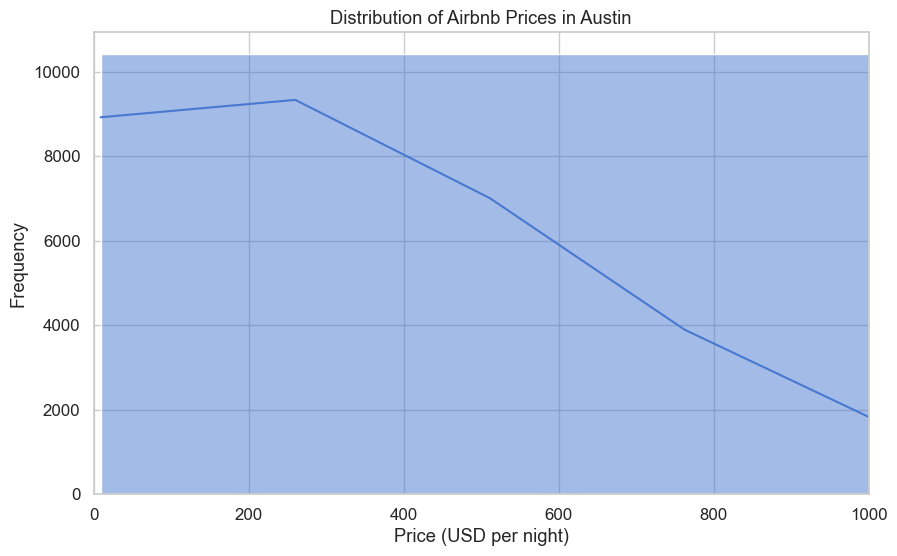

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df_sub['price'], bins=50, kde=True)
plt.xlim(0, 1000)
plt.title('Distribution of Airbnb Prices in Austin')
plt.xlabel('Price (USD per night)')
plt.ylabel('Frequency')
plt.show()

## 🏙️ Step 3: Neighborhood Analysis
Goal: Compare median price by neighborhood.


/var/folders/86/csc6l0s55614l3wzzvyy1z340000gn/T/ipykernel_84749/3748494602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neigh_prices.values, y=neigh_prices.index, palette='crest')


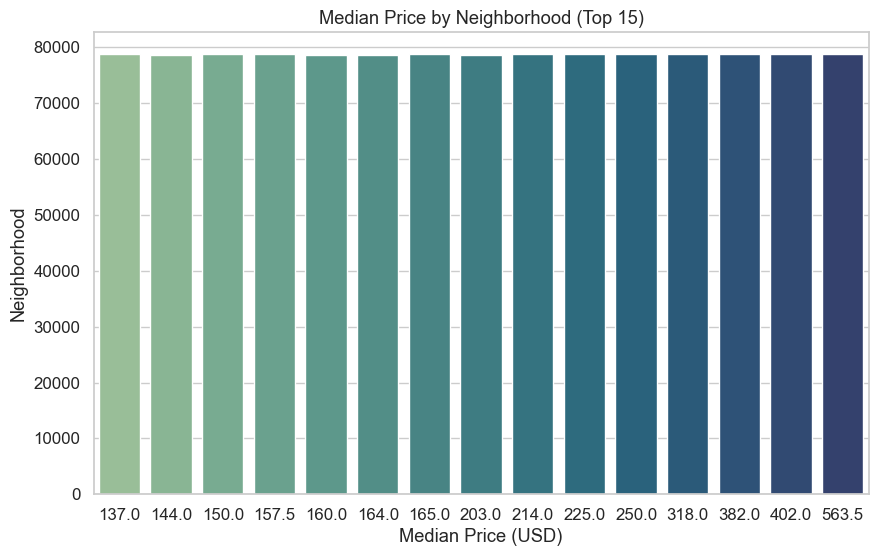

In [7]:
neigh_prices = df_sub.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=neigh_prices.values, y=neigh_prices.index, palette='crest')
plt.title('Median Price by Neighborhood (Top 15)')
plt.xlabel('Median Price (USD)')
plt.ylabel('Neighborhood')
plt.show()

## 🎲 Step 4: Probability & Statistics
Goal: Build intuition using sample means and variance.


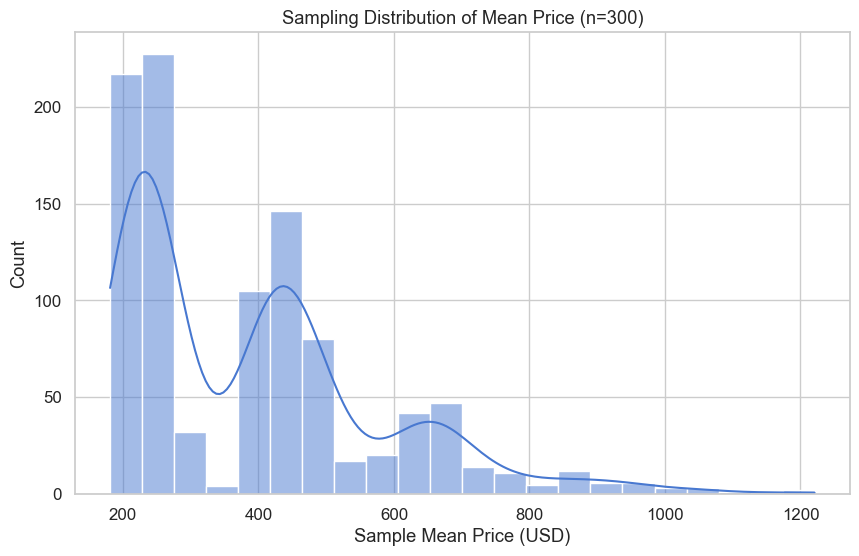

(np.float64(390.23585406844836), np.float64(187.84058597586642))

In [8]:
# Example: Sampling mean price distribution
sample_means = [df_sub['price'].sample(300, random_state=i).mean() for i in range(1000)]
sns.histplot(sample_means, kde=True)
plt.title('Sampling Distribution of Mean Price (n=300)')
plt.xlabel('Sample Mean Price (USD)')
plt.show()

np.mean(sample_means), np.std(sample_means)

## 🧭 Step 5: Insights Summary
- Which neighborhoods have the highest median price?
- How concentrated are listings around certain price bands?
- What does the sampling variance suggest about market predictability?
